<a href="https://colab.research.google.com/github/denismarttins/colab/blob/main/estat%C3%ADstica_criminal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fonte das informações:**
http://www.ssp.sp.gov.br/transparenciassp/
https://colab.research.google.com/notebooks/io.ipynb


In [ ]:
#BIBLIOTECAS USADAS 
!pip install pandas
!pip install --upgrade gspread
import pandas as pd

In [ ]:
#AUTENTICAÇÃO PARA USAR ARQUIVOS
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#BUSCANDO O ARQUIVO E ARMAZENANDO NUMA VARIÁVEL
furtos_celular = gc.open("furtos_celular")
feminicidio = gc.open("feminicidio")
roubos_celular = gc.open("roubo_celular")
celular = furtos_celular.sheet1
mortes = feminicidio.sheet1
roubos = roubos_celular.sheet1

In [ ]:
#FUNÇÃO QUE IRÁ SELECIONAR E EXIBIR OS DADOS
def escolha (dados):
  if dados == "celular":
    #OPÇÃO PARA MOSTRAR A COLUNA É return celular.row.values (1)
    celular.row_values(1)
    df = pd.DataFrame(celular.get_all_records())
    filtros = df[['PERIDOOCORRENCIA','LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE','MARCA_CELULAR']]
    display(filtros)
    #DADOS NOS GRÁFICOS
    filtros.groupby(['MARCA_CELULAR']).MARCA_CELULAR.count().plot(kind="bar")
  elif dados == "mortes":
    mortes.row_values(1)
    df = pd.DataFrame(mortes.get_all_records())
    filtros = df[['MUNICIPIO_CIRCUNSCRICAO','DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'IDADE_PESSOA', 'COR_PELE']]
    display(filtros)
    #DADOS NOS GRÁFICOS
    filtros.groupby(['COR_PELE']).COR_PELE.count().plot(kind="barh")
  elif dados == "roubos":
    roubos.row_values(1)
    df = pd.DataFrame(roubos.get_all_records())
    filtros = df[['PERIDOOCORRENCIA','LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE','MARCA_CELULAR']]
    display(filtros)
    #DADOS NOS GRÁFICOS
    filtros.groupby(['MARCA_CELULAR']).MARCA_CELULAR.count().plot(kind="barh")
  else:
    print("Opção inválida!")

In [ ]:
show_info = input("Digite qual dado quer exibir: celular - mortes - roubos => ")

Digite qual dado quer exibir: celular - mortes - roubos => roubos


,PERIDOOCORRENCIA,LOGRADOURO,NUMERO,BAIRRO,CIDADE,MARCA_CELULAR
0,A NOITE,Rodovia Engenheiro Geraldo Mantovani,1.0,Estância Suíça,SERRA NEGRA,Motorola
1,A NOITE,RODOVIA SP 330,67.0,CIDADE JARDIM,LOUVEIRA,Samsung
2,A NOITE,RUA JORNALISTA PAULO MARTINELLI,417.0,JARDIM IPAUSSURAMA,CAMPINAS,SAMSUNG
3,A TARDE,RUA TAMÔIO,343.0,RURAL,INDAIATUBA,OUTROS
4,EM HORA INCERTA,AVENIDA DA SAUDADE,354.0,PONTE PRETA,CAMPINAS,SAMSUNG
...,...,...,...,...,...,...
1165,DE MADRUGADA,RODOVIA SP 354,5.0,BAIRRO DOS SOARES,JARINU,Apple
1166,DE MADRUGADA,RODOVIA SP 354,5.0,BAIRRO DOS SOARES,JARINU,Apple
1167,A TARDE,,0.0,Residencial Vida Nova II,VINHEDO,Outros
1168,A NOITE,RUA FREI CANECA,148.0,VILA ARENS E PROGRESSO,JUNDIAI,Asus


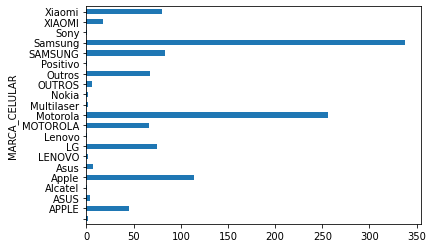

In [ ]:
info = escolha(show_info)
#print(info)